In [289]:
# Import necessary packages
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
torch.manual_seed(7)
np.random.seed(7)

import helper

import matplotlib.pyplot as plt

In [290]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [291]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [292]:
images.shape

torch.Size([64, 1, 28, 28])

In [293]:
labels

tensor([ 2,  5,  3,  2,  1,  5,  3,  4,  1,  0,  9,  4,  2,  8,
         1,  8,  8,  4,  4,  4,  6,  9,  0,  0,  6,  8,  7,  6,
         4,  6,  9,  1,  5,  3,  3,  1,  8,  6,  5,  0,  6,  5,
         2,  1,  2,  5,  0,  1,  5,  0,  3,  2,  2,  8,  0,  9,
         6,  8,  3,  1,  5,  9,  6,  8])

In [294]:
len(labels)

64

In [295]:
len(images)

64

In [296]:
images[0].view(1, 28*28).shape

torch.Size([1, 784])

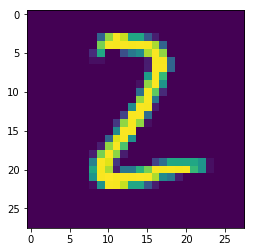

In [297]:
plt.imshow(images[12].numpy().reshape(28, 28))
    

In [298]:
def activation(x):
    return 1/(1+torch.exp(-x))

n_input  = 28*28 #784
n_hidden = 256  # 256 hiddern unit
n_out    = 10

In [299]:
inputs = images.view(images.shape[0], -1) # 64x78

W1 = torch.randn(n_input, n_hidden) # 784 x 256
W2 = torch.randn(n_hidden, n_out)   # 256 x 10

B1 = torch.randn(1, 256)
B2 = torch.randn(1, 10)

In [300]:
h = activation(torch.mm(inputs, W1) + B1)
h.shape

torch.Size([64, 256])

In [301]:
out = torch.mm(h, W2) + B2
out.shape

torch.Size([64, 10])

In [302]:
out.shape

torch.Size([64, 10])

In [303]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)


out = softmax(out)
out.sum(dim=1)

tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000])